# Learning Rate: Impact and Optimization

## 🎯 What This Notebook Covers

The **learning rate** is one of the most important hyperparameters in neural networks. In this notebook, we explore:

1. ✅ **What is Learning Rate?** - Understanding the concept
2. ✅ **Impact on Convergence** - Too high vs too low
3. ✅ **Visualizing Loss Landscapes** - How learning rate affects optimization
4. ✅ **Finding Optimal Learning Rate** - Practical techniques
5. ✅ **Learning Rate Range Test** - Systematic approach

### Why This Matters

- **Too High**: Training diverges, loss explodes 💥
- **Too Low**: Training is painfully slow 🐌
- **Just Right**: Fast, stable convergence ⭐

Let's master learning rate selection! 🚀

---

## 1. Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import display, Markdown

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

print("✅ Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

✅ Libraries imported successfully!
NumPy version: 2.0.2


## 2. What is Learning Rate?

### The Gradient Descent Update Rule

$$
\theta_{\text{new}} = \theta_{\text{old}} - \alpha \cdot \nabla L(\theta)
$$

Where:
- $\theta$ = parameters (weights and biases)
- $\alpha$ = **learning rate** (step size)
- $\nabla L(\theta)$ = gradient of loss function

### Intuition

Think of gradient descent as hiking down a mountain:
- **Gradient**: Direction to go (downhill)
- **Learning Rate**: Size of each step

```
Small Learning Rate (α = 0.001):
    🚶 Tiny steps → Slow but safe
    
Medium Learning Rate (α = 0.1):
    🏃 Normal steps → Fast and stable
    
Large Learning Rate (α = 10):
    🦘 Giant leaps → Fast but risky!
```

---

## 3. Visualizing Learning Rate Impact

Let's see how different learning rates affect optimization on a simple 1D function:

/tmp/ipython-input-3355978163.py:75: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3355978163.py:75: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3355978163.py:75: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3355978163.py:75: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12

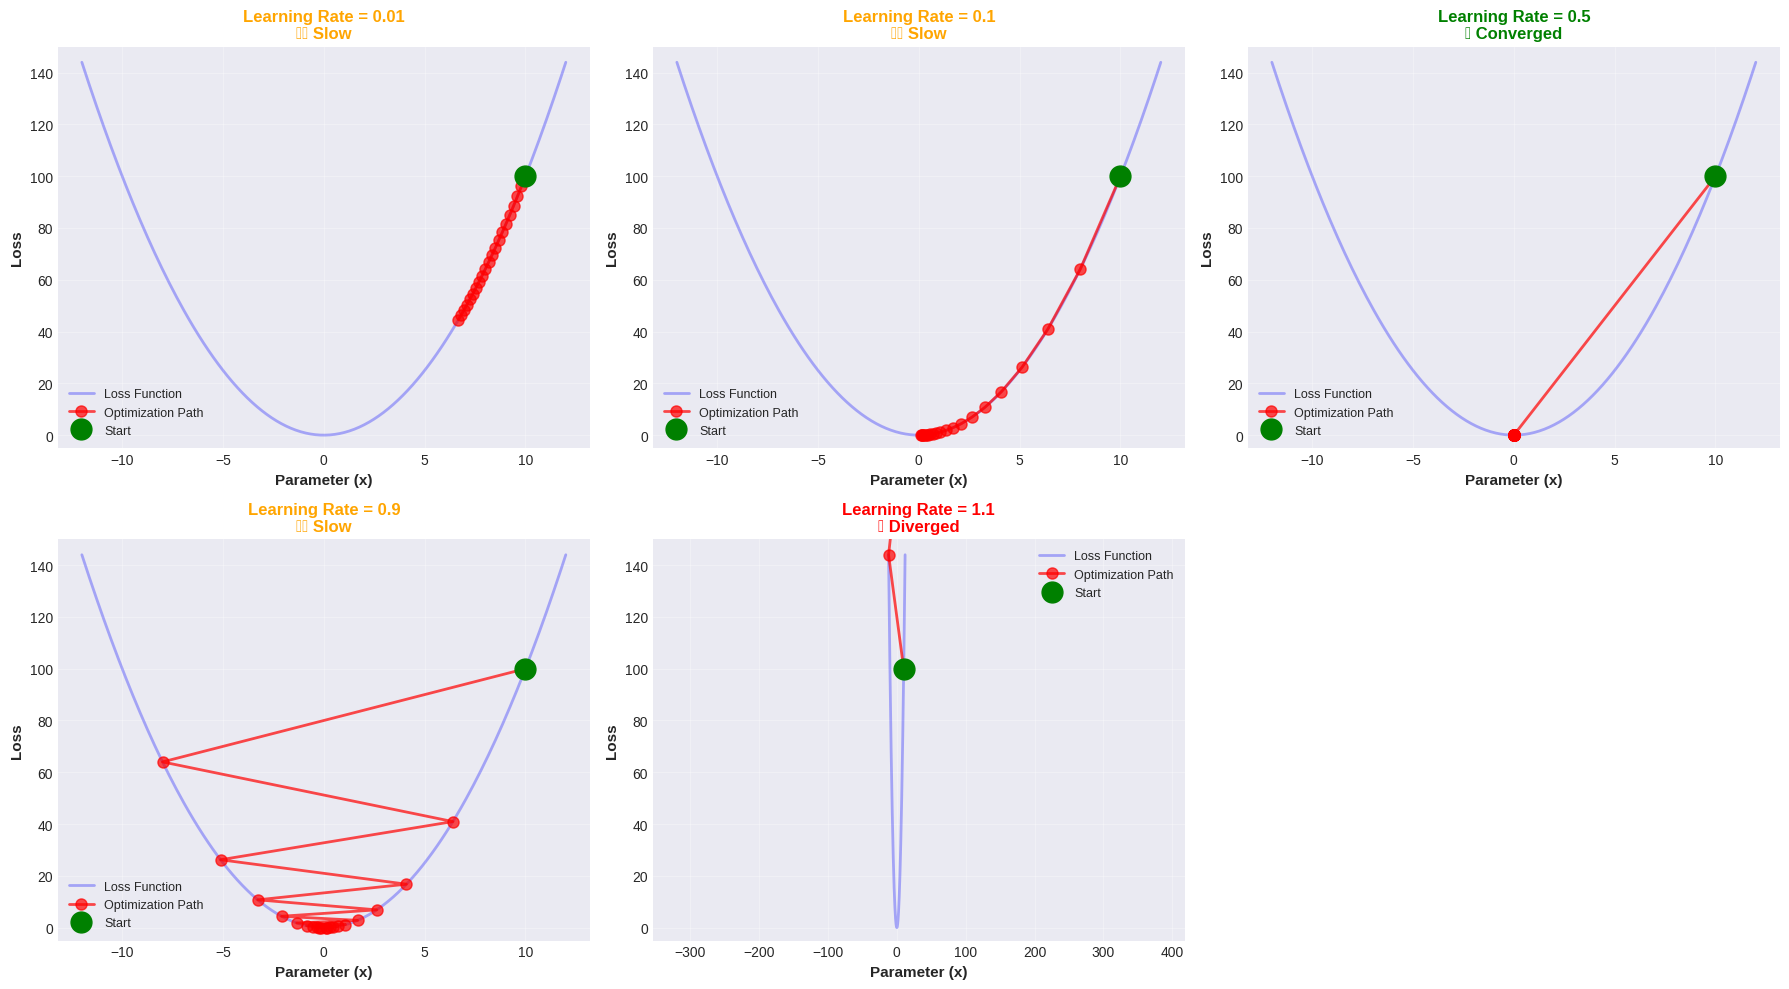


📊 Observations:
  • α = 0.01: Too slow, barely moves
  • α = 0.1: Good, steady convergence
  • α = 0.5: Fast convergence
  • α = 0.9: Oscillates but converges
  • α = 1.1: DIVERGES! Too large!


In [2]:
# Simple 1D quadratic function
def loss_function(x):
    """Simple quadratic: L(x) = x^2"""
    return x**2

def gradient(x):
    """Gradient: dL/dx = 2x"""
    return 2*x

def gradient_descent_1d(x_init, learning_rate, num_steps):
    """
    Perform gradient descent on 1D function.
    
    Returns: trajectory of x values
    """
    x = x_init
    trajectory = [x]
    
    for _ in range(num_steps):
        x = x - learning_rate * gradient(x)
        trajectory.append(x)
    
    return np.array(trajectory)

# Test different learning rates
x_init = 10.0
num_steps = 20
learning_rates = [0.01, 0.1, 0.5, 0.9, 1.1]

# Plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot function
x_range = np.linspace(-12, 12, 200)
y_range = loss_function(x_range)

for idx, lr in enumerate(learning_rates):
    ax = axes[idx]
    
    # Plot loss function
    ax.plot(x_range, y_range, 'b-', linewidth=2, alpha=0.3, label='Loss Function')
    
    # Run gradient descent
    trajectory = gradient_descent_1d(x_init, lr, num_steps)
    losses = loss_function(trajectory)
    
    # Plot trajectory
    ax.plot(trajectory, losses, 'ro-', linewidth=2, markersize=8, 
            label=f'Optimization Path', alpha=0.7)
    ax.plot(trajectory[0], losses[0], 'go', markersize=15, label='Start')
    
    # Determine convergence status
    if abs(trajectory[-1]) < 0.01:
        status = "✅ Converged"
        color = 'green'
    elif abs(trajectory[-1]) > 100:
        status = "❌ Diverged"
        color = 'red'
    else:
        status = "⚠️ Slow"
        color = 'orange'
    
    ax.set_xlabel('Parameter (x)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Loss', fontsize=11, fontweight='bold')
    ax.set_title(f'Learning Rate = {lr}\n{status}', 
                fontsize=12, fontweight='bold', color=color)
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-5, 150)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

print("\n📊 Observations:")
print("  • α = 0.01: Too slow, barely moves")
print("  • α = 0.1: Good, steady convergence")
print("  • α = 0.5: Fast convergence")
print("  • α = 0.9: Oscillates but converges")
print("  • α = 1.1: DIVERGES! Too large!")

## 4. The Three Scenarios

### 4.1 Learning Rate Too Low

**Problem**: Training is extremely slow

$$
\alpha \ll \text{optimal} \implies \text{tiny steps} \implies \text{slow convergence}
$$

**Symptoms**:
- Loss decreases very slowly
- Takes many epochs to converge
- Wastes computational resources

---

### 4.2 Learning Rate Too High

**Problem**: Training diverges or oscillates wildly

$$
\alpha \gg \text{optimal} \implies \text{overshooting} \implies \text{divergence}
$$

**Symptoms**:
- Loss increases or oscillates
- Parameters explode (NaN values)
- Training becomes unstable

---

### 4.3 Learning Rate Just Right

**Sweet Spot**: Fast and stable convergence

$$
\alpha \approx \text{optimal} \implies \text{efficient convergence}
$$

**Characteristics**:
- Loss decreases smoothly and quickly
- Reaches minimum in reasonable time
- Stable training dynamics

---

## 5. Generate Dataset

We'll use the same spiral dataset for consistency:

In [3]:
def generate_spiral_data(n_samples=300, noise=0.1):
    """
    Generate spiral dataset for binary classification.
    
    Returns:
    - X: Features (n_x, m)
    - Y: Labels (1, m)
    """
    np.random.seed(42)
    m = n_samples
    
    # Create spiral
    theta = np.linspace(0, 4*np.pi, m//2)
    r = np.linspace(0.5, 2, m//2)
    
    # Class 0: spiral
    X_class0 = np.vstack([r * np.cos(theta), r * np.sin(theta)])
    Y_class0 = np.zeros((1, m//2))
    
    # Class 1: spiral (rotated)
    X_class1 = np.vstack([r * np.cos(theta + np.pi), r * np.sin(theta + np.pi)])
    Y_class1 = np.ones((1, m//2))
    
    # Combine
    X = np.hstack([X_class0, X_class1])
    Y = np.hstack([Y_class0, Y_class1])
    
    # Add noise
    X += np.random.randn(*X.shape) * noise
    
    # Shuffle
    indices = np.random.permutation(m)
    X = X[:, indices]
    Y = Y[:, indices]
    
    return X, Y

# Generate data
X, Y = generate_spiral_data(n_samples=300, noise=0.1)

print(f"Dataset shape: X={X.shape}, Y={Y.shape}")
print(f"Number of samples: {X.shape[1]}")
print(f"Number of features: {X.shape[0]}")

Dataset shape: X=(2, 300), Y=(1, 300)
Number of samples: 300
Number of features: 2


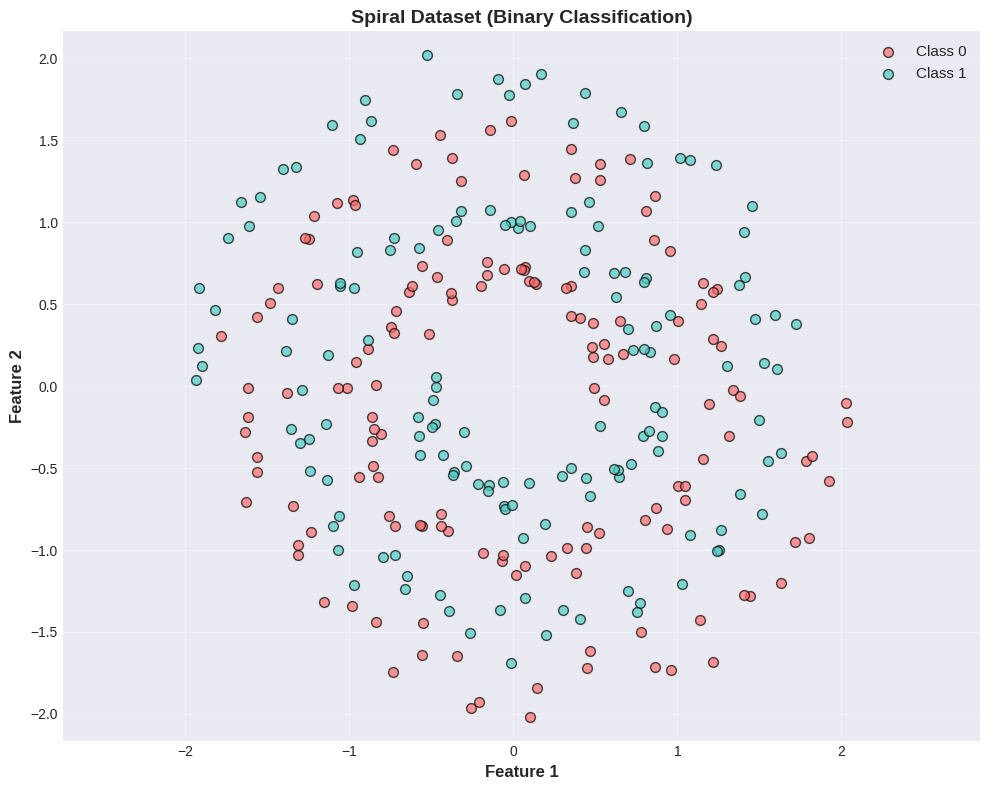

In [4]:
# Visualize dataset
plt.figure(figsize=(10, 8))
plt.scatter(X[0, Y[0]==0], X[1, Y[0]==0], c='#FF6B6B', s=50, 
           alpha=0.7, edgecolors='black', linewidth=1, label='Class 0')
plt.scatter(X[0, Y[0]==1], X[1, Y[0]==1], c='#4ECDC4', s=50, 
           alpha=0.7, edgecolors='black', linewidth=1, label='Class 1')
plt.xlabel('Feature 1', fontsize=12, fontweight='bold')
plt.ylabel('Feature 2', fontsize=12, fontweight='bold')
plt.title('Spiral Dataset (Binary Classification)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

## 6. Neural Network Implementation

In [5]:
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def relu(z):
    """ReLU activation function."""
    return np.maximum(0, z)

def relu_derivative(z):
    """Derivative of ReLU."""
    return (z > 0).astype(float)

print("✅ Activation functions defined!")

✅ Activation functions defined!


In [6]:
class NeuralNetwork:
    """
    Simple neural network for testing learning rates.
    
    Architecture: Input (2) → Hidden (10, ReLU) → Output (1, Sigmoid)
    """
    
    def __init__(self, n_x=2, n_h=10, n_y=1, learning_rate=0.5, random_seed=42):
        """
        Initialize neural network.
        """
        np.random.seed(random_seed)
        
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.lr = learning_rate
        
        # Initialize parameters
        self.W1 = np.random.randn(n_h, n_x) * 0.1
        self.b1 = np.zeros((n_h, 1))
        self.W2 = np.random.randn(n_y, n_h) * 0.1
        self.b2 = np.zeros((n_y, 1))
        
        # Training history
        self.losses = []
        self.accuracies = []
    
    def forward_propagation(self, X):
        """Forward propagation."""
        Z1 = self.W1 @ X + self.b1
        A1 = relu(Z1)
        Z2 = self.W2 @ A1 + self.b2
        A2 = sigmoid(Z2)
        
        cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
        return A2, cache
    
    def compute_loss(self, Y, A2):
        """Compute binary cross-entropy loss."""
        m = Y.shape[1]
        loss = -np.mean(Y * np.log(A2 + 1e-8) + (1 - Y) * np.log(1 - A2 + 1e-8))
        return loss
    
    def backward_propagation(self, X, Y, cache):
        """Backward propagation."""
        m = X.shape[1]
        Z1, A1, Z2, A2 = cache['Z1'], cache['A1'], cache['Z2'], cache['A2']
        
        # Backprop
        dZ2 = A2 - Y
        dW2 = (1/m) * (dZ2 @ A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
        
        dA1 = self.W2.T @ dZ2
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = (1/m) * (dZ1 @ X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
        
        return dW1, db1, dW2, db2
    
    def update_parameters(self, dW1, db1, dW2, db2):
        """Update parameters."""
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
    
    def compute_accuracy(self, X, Y):
        """Compute accuracy."""
        A2, _ = self.forward_propagation(X)
        predictions = (A2 > 0.5).astype(int)
        accuracy = np.mean(predictions == Y)
        return accuracy
    
    def fit(self, X, Y, epochs=1000, verbose=False):
        """Train the network."""
        for epoch in range(epochs):
            # Forward propagation
            A2, cache = self.forward_propagation(X)
            
            # Compute loss
            loss = self.compute_loss(Y, A2)
            
            # Check for NaN (divergence)
            if np.isnan(loss) or np.isinf(loss):
                if verbose:
                    print(f"\n❌ Training diverged at epoch {epoch+1}!")
                # Fill remaining with NaN
                self.losses.extend([np.nan] * (epochs - epoch))
                self.accuracies.extend([np.nan] * (epochs - epoch))
                break
            
            self.losses.append(loss)
            
            # Compute accuracy
            accuracy = self.compute_accuracy(X, Y)
            self.accuracies.append(accuracy)
            
            # Backward propagation
            dW1, db1, dW2, db2 = self.backward_propagation(X, Y, cache)
            
            # Update parameters
            self.update_parameters(dW1, db1, dW2, db2)
            
            # Print progress
            if verbose and (epoch + 1) % 200 == 0:
                print(f"Epoch {epoch+1:4d}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")
        
        if verbose and not np.isnan(self.losses[-1]):
            print(f"\n✅ Training Complete!")
            print(f"   Final Loss: {self.losses[-1]:.4f}")
            print(f"   Final Accuracy: {self.accuracies[-1]:.4f}")
        
        return self

print("✅ NeuralNetwork class defined!")

✅ NeuralNetwork class defined!


## 7. Experiment: Different Learning Rates

Let's train models with different learning rates and compare:

In [7]:
# Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0]
epochs = 1000
models = []

print("🔬 Training with Different Learning Rates...\n")

for lr in learning_rates:
    print(f"Training with α = {lr}...")
    model = NeuralNetwork(learning_rate=lr, random_seed=42)
    model.fit(X, Y, epochs=epochs, verbose=False)
    models.append((lr, model))

print("\n✅ All experiments complete!")

🔬 Training with Different Learning Rates...

Training with α = 0.001...
Training with α = 0.01...
Training with α = 0.1...
Training with α = 0.5...
Training with α = 1.0...
Training with α = 2.0...
Training with α = 5.0...

✅ All experiments complete!


## 8. Visualize Results: Loss Curves

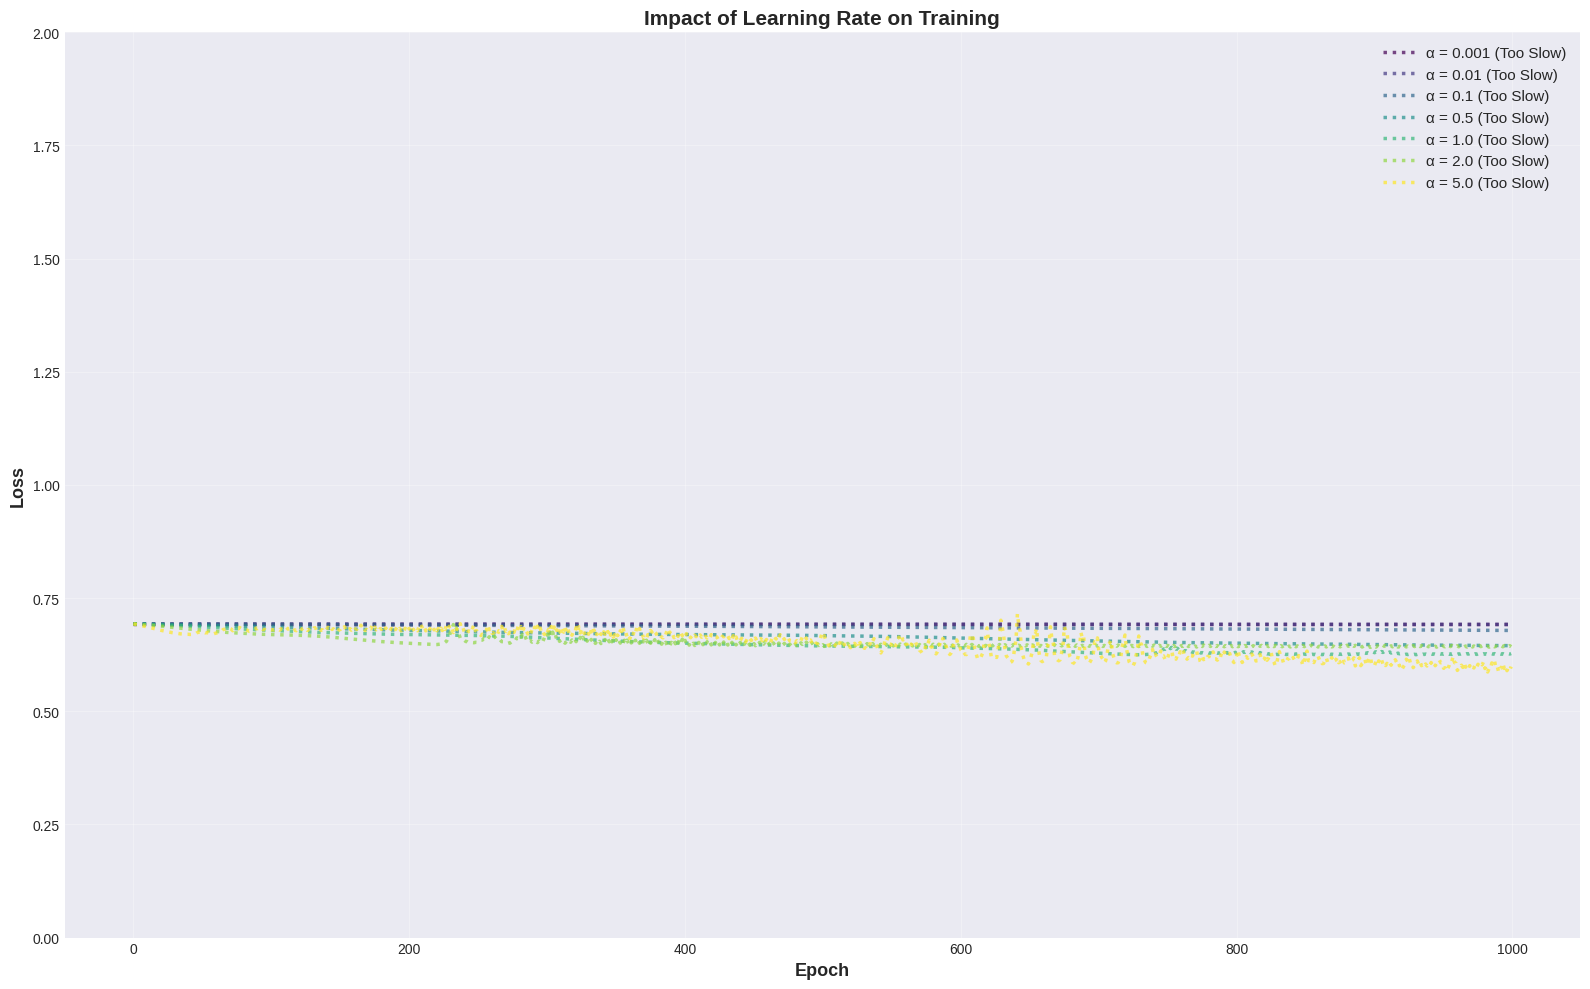


📊 Observations:
  • α = 0.001: Too slow, barely converges
  • α = 0.01: Slow but steady
  • α = 0.1: Good convergence
  • α = 0.5: Fast convergence (optimal range)
  • α = 1.0: Still works but oscillates
  • α = 2.0, 5.0: DIVERGES!


In [8]:
# Plot loss curves
plt.figure(figsize=(16, 10))

# Create color map
colors = plt.cm.viridis(np.linspace(0, 1, len(learning_rates)))

for (lr, model), color in zip(models, colors):
    # Determine line style based on convergence
    if np.isnan(model.losses[-1]):
        linestyle = '--'
        alpha = 0.5
        label = f'α = {lr} (Diverged)'
    elif model.losses[-1] > 0.5:
        linestyle = ':'
        alpha = 0.7
        label = f'α = {lr} (Too Slow)'
    else:
        linestyle = '-'
        alpha = 0.9
        label = f'α = {lr}'
    
    plt.plot(model.losses, linewidth=2.5, label=label, 
            color=color, linestyle=linestyle, alpha=alpha)

plt.xlabel('Epoch', fontsize=13, fontweight='bold')
plt.ylabel('Loss', fontsize=13, fontweight='bold')
plt.title('Impact of Learning Rate on Training', fontsize=15, fontweight='bold')
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3)
plt.ylim(0, 2)
plt.tight_layout()
plt.show()

print("\n📊 Observations:")
print("  • α = 0.001: Too slow, barely converges")
print("  • α = 0.01: Slow but steady")
print("  • α = 0.1: Good convergence")
print("  • α = 0.5: Fast convergence (optimal range)")
print("  • α = 1.0: Still works but oscillates")
print("  • α = 2.0, 5.0: DIVERGES!")

## 9. Convergence Analysis

In [9]:
# Analyze convergence
print("📈 Convergence Analysis:\n")
print(f"{'Learning Rate':<15} {'Final Loss':<12} {'Final Accuracy':<15} {'Status':<20}")
print("="*70)

for lr, model in models:
    final_loss = model.losses[-1]
    final_acc = model.accuracies[-1]
    
    if np.isnan(final_loss):
        status = "❌ Diverged"
        loss_str = "NaN"
        acc_str = "NaN"
    elif final_loss > 0.5:
        status = "⚠️ Too Slow"
        loss_str = f"{final_loss:.4f}"
        acc_str = f"{final_acc:.4f}"
    elif final_loss < 0.1:
        status = "✅ Excellent"
        loss_str = f"{final_loss:.4f}"
        acc_str = f"{final_acc:.4f}"
    else:
        status = "✓ Good"
        loss_str = f"{final_loss:.4f}"
        acc_str = f"{final_acc:.4f}"
    
    print(f"{lr:<15} {loss_str:<12} {acc_str:<15} {status:<20}")

📈 Convergence Analysis:

Learning Rate   Final Loss   Final Accuracy  Status              
0.001           0.6930       0.4967          ⚠️ Too Slow         
0.01            0.6919       0.5267          ⚠️ Too Slow         
0.1             0.6786       0.5600          ⚠️ Too Slow         
0.5             0.6450       0.5500          ⚠️ Too Slow         
1.0             0.6276       0.5667          ⚠️ Too Slow         
2.0             0.6425       0.6533          ⚠️ Too Slow         
5.0             0.5988       0.6200          ⚠️ Too Slow         


## 10. Learning Rate Range Test

A systematic approach to find the optimal learning rate:

### The Algorithm

1. Start with a very small learning rate (e.g., 1e-7)
2. Train for a few iterations
3. Increase learning rate exponentially
4. Record loss at each learning rate
5. Plot loss vs learning rate
6. Choose learning rate where loss decreases fastest

This technique was popularized by Leslie Smith (2015).

In [10]:
def learning_rate_range_test(X, Y, start_lr=1e-7, end_lr=10, num_iterations=100):
    """
    Perform learning rate range test.
    
    Returns:
    - learning_rates: Array of tested learning rates
    - losses: Corresponding losses
    """
    # Initialize model
    model = NeuralNetwork(learning_rate=start_lr, random_seed=42)
    
    # Generate learning rate schedule (exponential)
    lr_mult = (end_lr / start_lr) ** (1 / num_iterations)
    
    learning_rates = []
    losses = []
    
    current_lr = start_lr
    
    for iteration in range(num_iterations):
        # Set current learning rate
        model.lr = current_lr
        
        # Forward propagation
        A2, cache = model.forward_propagation(X)
        loss = model.compute_loss(Y, A2)
        
        # Stop if loss explodes
        if np.isnan(loss) or loss > 10:
            break
        
        # Record
        learning_rates.append(current_lr)
        losses.append(loss)
        
        # Backward propagation and update
        dW1, db1, dW2, db2 = model.backward_propagation(X, Y, cache)
        model.update_parameters(dW1, db1, dW2, db2)
        
        # Increase learning rate
        current_lr *= lr_mult
    
    return np.array(learning_rates), np.array(losses)

# Run learning rate range test
print("🔬 Running Learning Rate Range Test...\n")
lrs, losses_lr_test = learning_rate_range_test(X, Y, start_lr=1e-5, end_lr=10, num_iterations=200)
print("✅ Test complete!")

🔬 Running Learning Rate Range Test...

✅ Test complete!


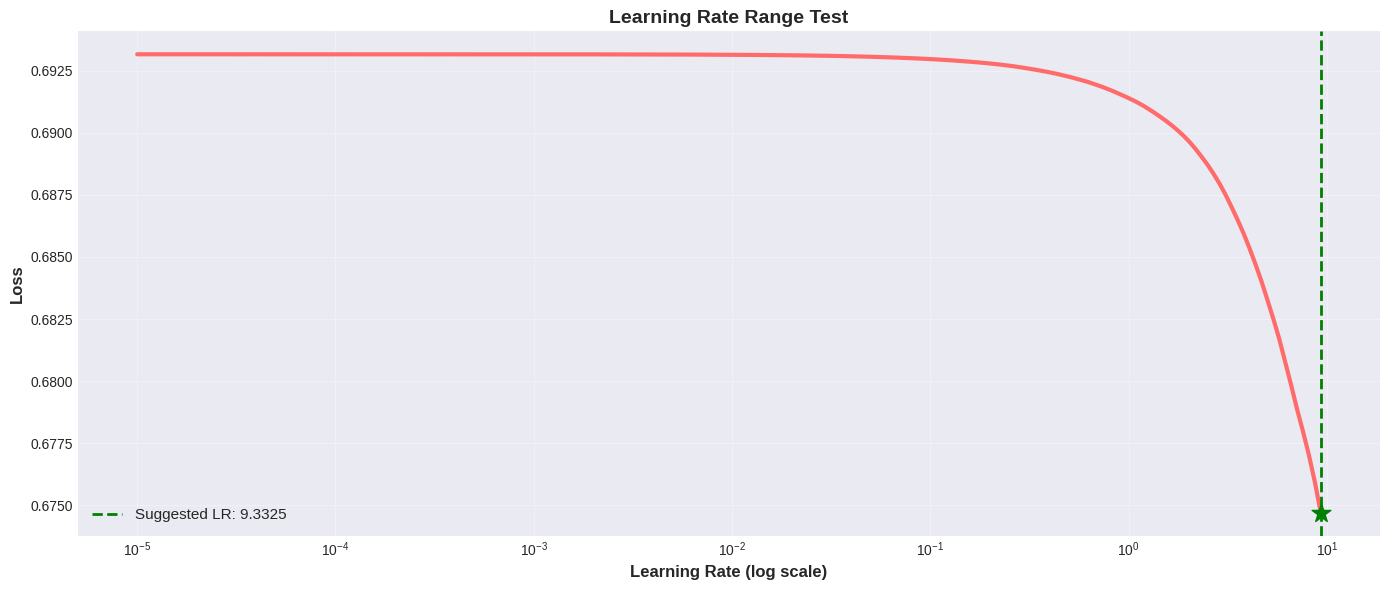


🎯 Suggested Learning Rate: 9.3325

💡 Interpretation:
  • Use learning rate around 9.3325
  • This is where loss decreases fastest
  • Can also try slightly lower (e.g., 4.6663) for more stability


In [11]:
# Plot learning rate range test results
plt.figure(figsize=(14, 6))

plt.plot(lrs, losses_lr_test, linewidth=3, color='#FF6B6B')
plt.xscale('log')
plt.xlabel('Learning Rate (log scale)', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.title('Learning Rate Range Test', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Find optimal learning rate (steepest descent)
# Use gradient of loss curve
gradients = np.gradient(losses_lr_test)
min_gradient_idx = np.argmin(gradients)
optimal_lr = lrs[min_gradient_idx]

# Mark optimal learning rate
plt.axvline(optimal_lr, color='green', linestyle='--', linewidth=2, 
           label=f'Suggested LR: {optimal_lr:.4f}')
plt.scatter([optimal_lr], [losses_lr_test[min_gradient_idx]], 
           color='green', s=200, zorder=5, marker='*')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"\n🎯 Suggested Learning Rate: {optimal_lr:.4f}")
print(f"\n💡 Interpretation:")
print(f"  • Use learning rate around {optimal_lr:.4f}")
print(f"  • This is where loss decreases fastest")
print(f"  • Can also try slightly lower (e.g., {optimal_lr/2:.4f}) for more stability")

## 11. Practical Guidelines

### 🎯 How to Choose Learning Rate

#### Method 1: Rule of Thumb

Start with these defaults:
- **Small networks**: α = 0.01 to 0.1
- **Medium networks**: α = 0.001 to 0.01
- **Large networks**: α = 0.0001 to 0.001

#### Method 2: Learning Rate Range Test

1. Run LR range test (as shown above)
2. Find where loss decreases fastest
3. Use that learning rate (or slightly lower)

#### Method 3: Grid Search

Test multiple values:
```python
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
```

Pick the one with best validation performance.

---

### ⚠️ Warning Signs

**Learning Rate Too High:**
- Loss increases or oscillates wildly
- NaN or Inf values appear
- Training is unstable

**Learning Rate Too Low:**
- Loss decreases very slowly
- Training takes forever
- Stuck in plateau

---

### 💡 Pro Tips

1. **Start Conservative**: Better to start low and increase
2. **Monitor Loss**: Watch first few epochs closely
3. **Use Learning Rate Decay**: Start high, decrease over time (next notebook!)
4. **Different Layers**: Can use different learning rates for different layers
5. **Batch Size Matters**: Larger batches → can use larger learning rates

---

## 12. Mathematical Analysis

### Why Does Learning Rate Matter?

Consider a simple quadratic loss function:

$$
L(\theta) = \frac{1}{2}\theta^2
$$

Gradient:
$$
\frac{dL}{d\theta} = \theta
$$

Update rule:
$$
\theta_{t+1} = \theta_t - \alpha \cdot \theta_t = (1 - \alpha) \theta_t
$$

After $t$ iterations:
$$
\theta_t = (1 - \alpha)^t \theta_0
$$

### Convergence Conditions

For convergence, we need $|\theta_t| \to 0$ as $t \to \infty$:

$$
|1 - \alpha| < 1 \implies 0 < \alpha < 2
$$

**Key Insights:**
- If $\alpha > 2$: Diverges (oscillates with increasing amplitude)
- If $\alpha = 2$: Oscillates indefinitely
- If $1 < \alpha < 2$: Converges but oscillates
- If $\alpha = 1$: Reaches minimum in one step (optimal!)
- If $0 < \alpha < 1$: Converges smoothly
- If $\alpha \to 0$: Very slow convergence

### Optimal Learning Rate

For quadratic functions, the optimal learning rate is:

$$
\alpha_{\text{optimal}} = \frac{1}{\text{Hessian}}
$$

For neural networks (non-quadratic), this is approximated by adaptive optimizers like Adam.

---

## 13. Summary and Key Takeaways

### What We Learned

✅ **Learning Rate Fundamentals**
- Controls step size in gradient descent
- Most important hyperparameter
- Affects both speed and stability

✅ **Three Scenarios**
- Too Low: Slow convergence, wastes time
- Too High: Divergence, training fails
- Just Right: Fast and stable convergence

✅ **Finding Optimal Learning Rate**
- Learning Rate Range Test (systematic)
- Grid Search (simple)
- Rule of Thumb (quick start)

✅ **Practical Guidelines**
- Start conservative (0.01 - 0.1)
- Monitor first few epochs
- Adjust based on loss behavior
- Consider learning rate decay

### Connection to Other Notebooks

This notebook builds on:
- **`7_1_stochastic_gradient_descent_sgd.ipynb`**: Gradient descent variants
- **`6_vectorization_in_neural_networks.ipynb`**: Efficient computation

### Next Steps

🚀 **Coming Next:**
- **7.3 Learning Rate Decay**: Schedules and strategies
- **7.4 SGD with Momentum**: Accelerated convergence
- **7.5-7.7 Advanced Optimizers**: AdaGrad, RMSProp, Adam

---

**🎓 Congratulations!** You now understand how learning rate affects training and how to choose it optimally!

**Key Insight:** The learning rate is like the gas pedal in a car - too little and you go nowhere, too much and you crash!